In [1]:
import pandas as pd
import numpy as np
import tensorflow
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from keras.preprocessing.image import (ImageDataGenerator, img_to_array,
load_img)
from tensorflow.keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time

Using TensorFlow backend.


In [2]:
img_width, img_height = 224,224

top_model_weights_path = 'bottleneck_fc_model.h5'

train_data_location = r'C:\Users\moham\Desktop\Dude\Final year project\Input_Data\train'
validation_data_location = r'C:\Users\moham\Desktop\Dude\Final year project\Input_Data\validation'
test_data_location = r'C:\Users\moham\Desktop\Dude\Final year project\Input_Data\test'
epochs = 10
batch_size = 50

In [3]:
vgg16 = applications.VGG16(include_top = False, weights = 'imagenet')

datagen = ImageDataGenerator(rescale = 1. /255)

In [4]:
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    train_data_location,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = None,
    shuffle = False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples/batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)


Found 106468 images belonging to 3 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Time:  6:01:24.839106


In [5]:
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    validation_data_location,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = None,
    shuffle = False)

nb_validation_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_validation = int(math.ceil(nb_validation_samples/batch_size))

bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation)

np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)

Found 23308 images belonging to 3 classes.
Time:  1:11:24.320364


In [6]:
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    test_data_location,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = None,
    shuffle = False)

nb_test_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_test = int(math.ceil(nb_test_samples/batch_size))

bottleneck_features_test = vgg16.predict_generator(generator, predict_size_test)

np.save('bottleneck_features_test.npy', bottleneck_features_test)
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)

Found 23069 images belonging to 3 classes.
Time:  1:11:02.703591


In [7]:
generator_top = datagen.flow_from_directory(
   train_data_location,
   target_size = (img_width, img_height),
   batch_size = batch_size,
   class_mode = 'categorical',
   shuffle = False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

train_data = np.load('bottleneck_features_train.npy')
train_labels = generator_top.classes

train_labels = to_categorical(train_labels,
                             num_classes = num_classes)




Found 106468 images belonging to 3 classes.


In [8]:
generator_top = datagen.flow_from_directory(
   validation_data_location,
   target_size = (img_width, img_height),
   batch_size = batch_size,
   class_mode = 'categorical',
   shuffle = False)

nb_validation_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = generator_top.classes

validation_labels = to_categorical(validation_labels,
                             num_classes = num_classes)




Found 23308 images belonging to 3 classes.


In [9]:
generator_top = datagen.flow_from_directory(
   test_data_location,
   target_size = (img_width, img_height),
   batch_size = batch_size,
   class_mode = 'categorical',
   shuffle = False)

nb_test_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

test_data = np.load('bottleneck_features_test.npy')
test_labels = generator_top.classes

test_labels = to_categorical(test_labels,
                             num_classes = num_classes)




Found 23069 images belonging to 3 classes.


In [26]:
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape = train_data.shape[1:]))
model.add(Dense(100, activation = tensorflow.keras.layers.LeakyReLU(alpha = 0.1)))
model.add(Dropout(0.5))
model.add(Dense(100, activation = tensorflow.keras.layers.LeakyReLU(alpha = 0.1)))
model.add(Dropout(0.5))
model.add(Dense(100, activation = tensorflow.keras.layers.LeakyReLU(alpha = 0.1)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', 
             optimizer = tensorflow.keras.optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])
history = model.fit(train_data, train_labels,
                   epochs = 75,
                   batch_size = batch_size,
                   validation_data = (validation_data, validation_labels))

model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate(
    validation_data, validation_labels,
    batch_size = batch_size, verbose = 1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
end = datetime.datetime.now()
elapsed = end - start
print('Time: ', elapsed)

Epoch 1/75
2130/2130 [==============================] - 78s 36ms/step - loss: 0.1209 - acc: 0.9558 - val_loss: 0.1708 - val_acc: 0.9618
Epoch 2/75
2130/2130 [==============================] - 76s 36ms/step - loss: 0.0278 - acc: 0.9938 - val_loss: 0.2530 - val_acc: 0.9586
Epoch 3/75
2130/2130 [==============================] - 74s 35ms/step - loss: 0.0228 - acc: 0.9952 - val_loss: 0.2013 - val_acc: 0.9599
Epoch 4/75
2130/2130 [==============================] - 76s 36ms/step - loss: 0.0211 - acc: 0.9961 - val_loss: 0.0928 - val_acc: 0.9785
Epoch 5/75
2130/2130 [==============================] - 73s 34ms/step - loss: 0.0180 - acc: 0.9968 - val_loss: 0.0683 - val_acc: 0.9897
Epoch 6/75
2130/2130 [==============================] - 73s 34ms/step - loss: 0.0170 - acc: 0.9970 - val_loss: 0.0987 - val_acc: 0.9802
Epoch 7/75
2130/2130 [==============================] - 73s 34ms/step - loss: 0.0172 - acc: 0.9973 - val_loss: 0.2962 - val_acc: 0.9488
Epoch 8/75
2130/2130 [==========================

Epoch 61/75
2130/2130 [==============================] - 58s 27ms/step - loss: 0.0094 - acc: 0.9989 - val_loss: 0.1609 - val_acc: 0.9836
Epoch 62/75
2130/2130 [==============================] - 61s 29ms/step - loss: 0.0087 - acc: 0.9991 - val_loss: 0.1260 - val_acc: 0.9877
Epoch 63/75
2130/2130 [==============================] - 68s 32ms/step - loss: 0.0095 - acc: 0.9991 - val_loss: 0.1060 - val_acc: 0.9910
Epoch 64/75
2130/2130 [==============================] - 60s 28ms/step - loss: 0.0079 - acc: 0.9990 - val_loss: 0.1053 - val_acc: 0.9915
Epoch 65/75
2130/2130 [==============================] - 59s 27ms/step - loss: 0.0105 - acc: 0.9991 - val_loss: 0.1409 - val_acc: 0.9866
Epoch 66/75
2130/2130 [==============================] - 62s 29ms/step - loss: 0.0127 - acc: 0.9989 - val_loss: 0.2190 - val_acc: 0.9772
Epoch 67/75
2130/2130 [==============================] - 57s 27ms/step - loss: 0.0077 - acc: 0.9991 - val_loss: 0.1481 - val_acc: 0.9834
Epoch 68/75
2130/2130 [==================

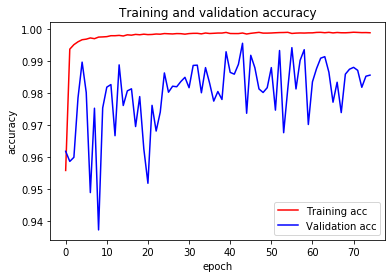

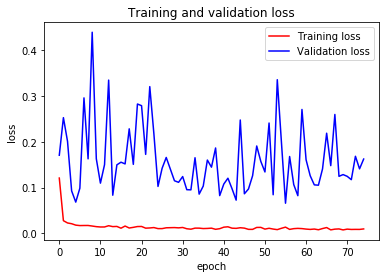

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [28]:
model.evaluate(test_data, test_labels)

721/721 [==============================] - 6s 8ms/step - loss: 0.5587 - acc: 0.9603


[0.5586922764778137, 0.9603363871574402]

In [25]:
preds = np.round(model.predict(test_data),0)
Space_objects = ['Rocket_Body', 'Satellite','Space_debris']
classification_metrics = metrics.classification_report(test_labels, preds,target_names=Space_objects)
print(classification_metrics)

              precision    recall  f1-score   support

 Rocket_Body       0.97      0.94      0.96      7157
   Satellite       0.94      0.97      0.96      7101
Space_debris       1.00      1.00      1.00      8811

   micro avg       0.97      0.97      0.97     23069
   macro avg       0.97      0.97      0.97     23069
weighted avg       0.97      0.97      0.97     23069
 samples avg       0.97      0.97      0.97     23069



C:\Users\moham\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
